In [77]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from sklearn.preprocessing import StandardScaler, MinMaxScaler
from collections import defaultdict
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split, cross_val_score 

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [78]:
# Load dataset.
tracks = pd.read_csv('data/fma_metadata/tracks_processed_filled.csv')

columns2drop = ['Unnamed: 0', 'track_id', 'artist_id']
#columns2drop = ['Unnamed: 0', 'track_id', 'artist_id','track_date_recorded_daytime','album_date_released_daytime']

tracks.drop(columns2drop, inplace=True, axis=1)

tracks.shape

(106486, 40)

In [79]:
class_name = 'Attribution-NonCommercial-ShareAlike 3.0 International'
#attributes = [col for col in tracks.columns if col != class_name]

In [80]:
selected_columns = ['album_date_created_year'] 

X = tracks[selected_columns].values
y = tracks[class_name].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

C:\Users\user\anaconda3\lib\site-packages\matplotlib\text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


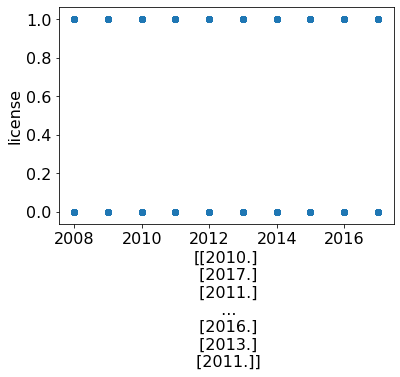

In [81]:
plt.scatter(X_train, y_train)
plt.xlabel(X_train, fontsize=16)
plt.ylabel('license',fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

**LOGISTIC REGRESSION**

In [82]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, f1_score, classification_report

In [83]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, solver='saga')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_score=clf.predict_proba(X_test)
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.8584486320666124
F1-score [0.92383359 0.        ]
              precision    recall  f1-score   support

           0       0.86      1.00      0.92     27424
           1       0.00      0.00      0.00      4522

    accuracy                           0.86     31946
   macro avg       0.43      0.50      0.46     31946
weighted avg       0.74      0.86      0.79     31946



C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [84]:
clf = LogisticRegression(random_state=0, solver='newton-cg')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_score=clf.predict_proba(X_test)
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

C:\Users\user\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\user\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\user\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\user\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\user\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line searc

Accuracy 0.8584486320666124
F1-score [0.92383359 0.        ]
              precision    recall  f1-score   support

           0       0.86      1.00      0.92     27424
           1       0.00      0.00      0.00      4522

    accuracy                           0.86     31946
   macro avg       0.43      0.50      0.46     31946
weighted avg       0.74      0.86      0.79     31946



C:\Users\user\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaco

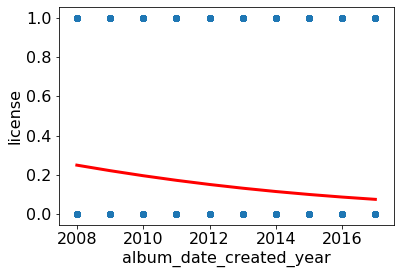

In [85]:
from scipy.special import expit
loss = expit(sorted(X_test) * clf.coef_ + clf.intercept_).ravel()
plt.plot(sorted(X_test), loss, color='red', linewidth=3)
plt.scatter(X_train, y_train)
plt.xlabel(selected_columns[0], fontsize=16)
plt.ylabel('license', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

**REGRESSIONE LINEARE**

In [86]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, SGDRegressor

regX = LinearRegression()
regX.fit(X_train, y_train)

LinearRegression()

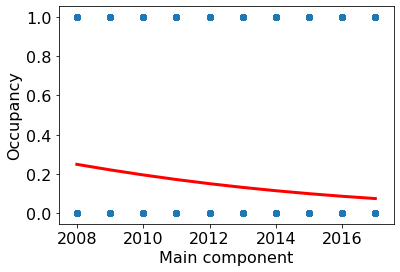

In [87]:
loss = expit(sorted(X_test) * clf.coef_ + clf.intercept_).ravel()
plt.plot(sorted(X_test), loss, color='red', linewidth=3)
plt.scatter(X_train, y_train)

plt.xlabel('Main component', fontsize=16)
plt.ylabel('Occupancy', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

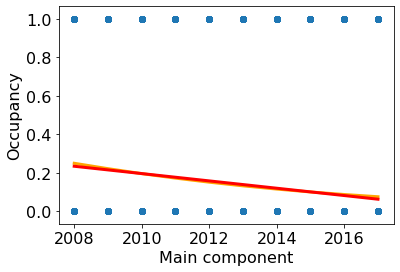

In [88]:
plt.scatter(X_train, y_train)

loss = expit(sorted(X_test) * clf.coef_ + clf.intercept_).ravel()
plt.plot(sorted(X_test), loss, color='orange', linewidth=3)
loss_pca_log=loss

plt.plot(sorted(X_test), regX.coef_ * sorted(X_test) + regX.intercept_, color='red', linewidth=3)

plt.xlabel('Main component', fontsize=16)
plt.ylabel('Occupancy', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

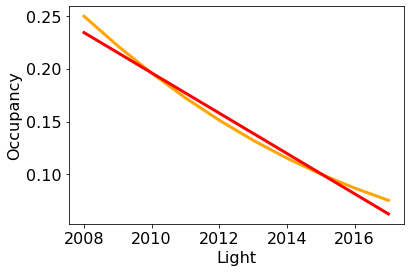

In [89]:
loss = expit(sorted(X_test) * clf.coef_ + clf.intercept_).ravel()
plt.plot(sorted(X_test), loss, color='orange', linewidth=3)
loss_l_log=loss

plt.plot(sorted(X_test), regX.coef_ * sorted(X_test) + regX.intercept_, color='red', linewidth=3)


plt.xlabel('Light', fontsize=16)
plt.ylabel('Occupancy', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

**PERCEPTRON**

In [90]:
from sklearn.linear_model import Perceptron
clf = Perceptron(random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.8584486320666124
F1-score [0.92383359 0.        ]
              precision    recall  f1-score   support

           0       0.86      1.00      0.92     27424
           1       0.00      0.00      0.00      4522

    accuracy                           0.86     31946
   macro avg       0.43      0.50      0.46     31946
weighted avg       0.74      0.86      0.79     31946



C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


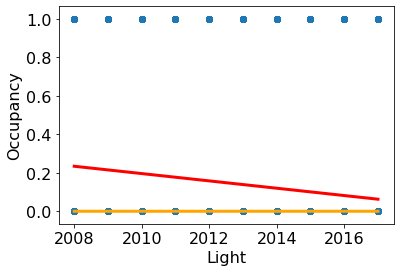

In [91]:
plt.scatter(X_train, y_train)

loss = expit(sorted(X_test) * clf.coef_ + clf.intercept_).ravel()
plt.plot(sorted(X_test), loss, color='orange', linewidth=3)
loss_l_perceptron=loss

plt.plot(sorted(X_test), regX.coef_ * sorted(X_test) + regX.intercept_, color='red', linewidth=3)


plt.xlabel('Light', fontsize=16)
plt.ylabel('Occupancy', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

**RidgeClassifierCV**

In [92]:
from sklearn.linear_model import RidgeClassifierCV
clf =RidgeClassifierCV(normalize=True)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.8584486320666124
F1-score [0.92383359 0.        ]
              precision    recall  f1-score   support

           0       0.86      1.00      0.92     27424
           1       0.00      0.00      0.00      4522

    accuracy                           0.86     31946
   macro avg       0.43      0.50      0.46     31946
weighted avg       0.74      0.86      0.79     31946



C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


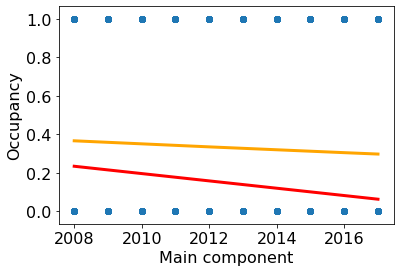

In [93]:
plt.scatter(X_train, y_train)

loss = expit(sorted(X_test) * clf.coef_ + clf.intercept_).ravel()
plt.plot(sorted(X_test), loss, color='orange', linewidth=3)
loss_pca_ridge=loss

plt.plot(sorted(X_test), regX.coef_ * sorted(X_test) + regX.intercept_, color='red', linewidth=3)


plt.xlabel('Main component', fontsize=16)
plt.ylabel('Occupancy', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

**LINEAR REGRESSION IN 2 DIMENSIONS**

In [94]:
from scipy.special import expit

clf = RidgeClassifierCV(class_weight='balanced')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.5445439178613911
F1-score [0.67260699 0.25192802]
              precision    recall  f1-score   support

           0       0.88      0.54      0.67     27424
           1       0.16      0.54      0.25      4522

    accuracy                           0.54     31946
   macro avg       0.52      0.54      0.46     31946
weighted avg       0.78      0.54      0.61     31946



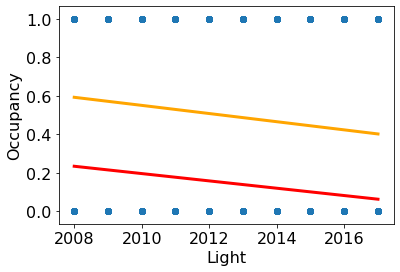

In [95]:
plt.scatter(X_train, y_train)

loss = expit(sorted(X_test) * clf.coef_ + clf.intercept_).ravel()
plt.plot(sorted(X_test), loss, color='orange', linewidth=3)
loss_l_ridge=loss

plt.plot(sorted(X_test), regX.coef_ * sorted(X_test) + regX.intercept_, color='red', linewidth=3)


plt.xlabel('Light', fontsize=16)
plt.ylabel('Occupancy', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

**PassiveAggressiveClassifier**

In [96]:
from sklearn.linear_model import PassiveAggressiveClassifier
clf =PassiveAggressiveClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.8584486320666124
F1-score [0.92383359 0.        ]
              precision    recall  f1-score   support

           0       0.86      1.00      0.92     27424
           1       0.00      0.00      0.00      4522

    accuracy                           0.86     31946
   macro avg       0.43      0.50      0.46     31946
weighted avg       0.74      0.86      0.79     31946



C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [97]:
from scipy.special import expit

clf = PassiveAggressiveClassifier(class_weight='balanced') # gives worst results
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.8584486320666124
F1-score [0.92383359 0.        ]
              precision    recall  f1-score   support

           0       0.86      1.00      0.92     27424
           1       0.00      0.00      0.00      4522

    accuracy                           0.86     31946
   macro avg       0.43      0.50      0.46     31946
weighted avg       0.74      0.86      0.79     31946



C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


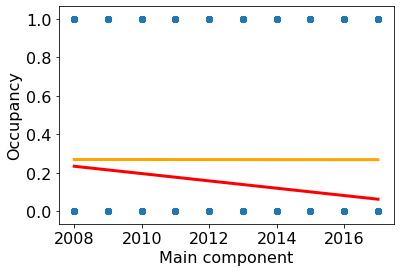

In [99]:
plt.scatter(X_train, y_train)

loss = expit(sorted(X_test) * clf.coef_ + clf.intercept_).ravel()
plt.plot(sorted(X_test), loss, color='orange', linewidth=3)
loss_l_pa=loss

plt.plot(sorted(X_test), regX.coef_ * sorted(X_test) + regX.intercept_, color='red', linewidth=3)


plt.xlabel('Main component', fontsize=16)
plt.ylabel('Occupancy', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

**RIDGE**

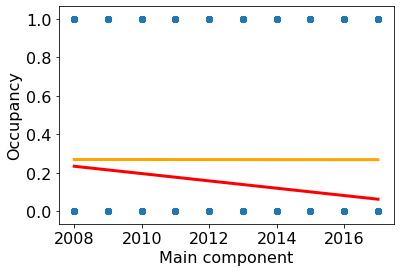

In [101]:
plt.scatter(X_train, y_train)

loss = expit(sorted(X_test) * clf.coef_ + clf.intercept_).ravel()
plt.plot(sorted(X_test), loss, color='orange', linewidth=3)
loss_pca_pa=loss

plt.plot(sorted(X_test), regX.coef_ * sorted(X_test) + regX.intercept_, color='red', linewidth=3)


plt.xlabel('Main component', fontsize=16)
plt.ylabel('Occupancy', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

**SGDClassifier**

In [102]:
from sklearn.linear_model import SGDClassifier
clf =SGDClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.8584486320666124
F1-score [0.92383359 0.        ]
              precision    recall  f1-score   support

           0       0.86      1.00      0.92     27424
           1       0.00      0.00      0.00      4522

    accuracy                           0.86     31946
   macro avg       0.43      0.50      0.46     31946
weighted avg       0.74      0.86      0.79     31946



C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [103]:
from scipy.special import expit

clf = SGDClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_train)

print('Accuracy %s' % accuracy_score(y_train, y_pred))
print('F1-score %s' % f1_score(y_train, y_pred, average=None))
print(classification_report(y_train, y_pred))

Accuracy 0.8559431177891065
F1-score [0.92238077 0.        ]
              precision    recall  f1-score   support

           0       0.86      1.00      0.92     63802
           1       0.00      0.00      0.00     10738

    accuracy                           0.86     74540
   macro avg       0.43      0.50      0.46     74540
weighted avg       0.73      0.86      0.79     74540



C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [104]:
from scipy.special import expit

clf = SGDClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_train)

print('Accuracy %s' % accuracy_score(y_train, y_pred))
print('F1-score %s' % f1_score(y_train, y_pred, average=None))
print(classification_report(y_train, y_pred))

Accuracy 0.8559431177891065
F1-score [0.92238077 0.        ]
              precision    recall  f1-score   support

           0       0.86      1.00      0.92     63802
           1       0.00      0.00      0.00     10738

    accuracy                           0.86     74540
   macro avg       0.43      0.50      0.46     74540
weighted avg       0.73      0.86      0.79     74540



C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


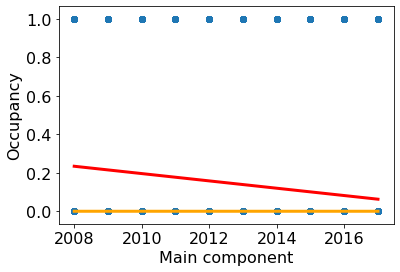

In [105]:
plt.scatter(X_train, y_train)

loss = expit(sorted(X_test) * clf.coef_ + clf.intercept_).ravel()
plt.plot(sorted(X_test), loss, color='orange', linewidth=3)
loss_l_sgdc=loss

plt.plot(sorted(X_test), regX.coef_ * sorted(X_test) + regX.intercept_, color='red', linewidth=3)


plt.xlabel('Main component', fontsize=16)
plt.ylabel('Occupancy', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

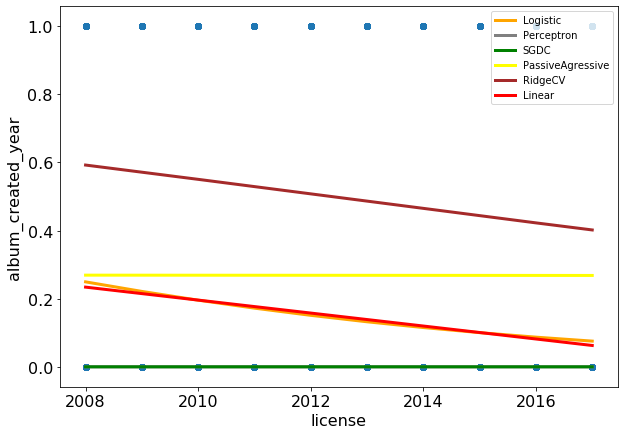

In [108]:
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train)

plt.plot(sorted(X_test), loss_l_log, color='orange', linewidth=3)
plt.plot(sorted(X_test), loss_l_perceptron, color='grey', linewidth=3)
plt.plot(sorted(X_test), loss_l_sgdc, color='green', linewidth=3)
plt.plot(sorted(X_test), loss_l_pa, color='yellow', linewidth=3)
plt.plot(sorted(X_test), loss_l_ridge, color='brown', linewidth=3)

plt.plot(sorted(X_test), regX.coef_ * sorted(X_test) + regX.intercept_, color='red', linewidth=3)

plt.legend(('Logistic','Perceptron','SGDC','PassiveAgressive','RidgeCV','Linear'),loc='best')
plt.xlabel('license', fontsize=16)
plt.ylabel('album_created_year', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()